In [1]:
def predict_by_name(model_predict, classes_names):
    for i, v in enumerate(model_predict):
        print(classes_names[i], '\t', str(round(v,5)))
def predict_decodder(model_predict, top=3):
    model_predict.sort()
    tmplist = []
    counter = 0
    for i, v in enumerate(model_predict):
        tmplist.append((classes_names[i], v))
        counter += 1
        if counter >= top: break
    return tmplist  

In [2]:
import os
import pandas as pd

base_dir = 'dataset/flowers-recognition_configed'
input_data_dir = {'test':None, 'train':None, 'validation':None}

totalcounter = 0
dfs = {'train':None, 'validation':None, 'test':None}
for i in input_data_dir:
    print(i)
    classes_names = os.listdir(os.path.join(base_dir, i))
    input_data_dir[i] = os.path.join(base_dir, i)
    classes = {}
    for s in classes_names:
        classes[s] = len(os.listdir(os.path.join(base_dir, i, s)))
        
    inputdata = {'flower':None, 'count':None}
    inputdata['flower'] = [f for f, c in classes.items()]
    inputdata['count'] = [c for f, c in classes.items()]
    
    dfs[i] = pd.DataFrame(inputdata)
    totalcounter += dfs[i]['count'].sum()
    print('\t', 'image count mean:', int(dfs[i]['count'].mean()))
    print('\t', 'image count :', int(dfs[i]['count'].sum()))
print('-'.join(['' for i in range(0, 16)]))
print('total image count:', totalcounter)    

class_count = len(classes)

test
	 image count mean: 183
	 image count : 915
train
	 image count mean: 368
	 image count : 1840
validation
	 image count mean: 181
	 image count : 905
---------------
total image count: 3660


In [3]:
def show_model_info(model_h):
    for i, v in model_h['hyper_parameters'].items():
        val = v
        if type(val) == str:
            if 'RMSprop' in v: val = 'RMSprop'
        print(i+':', '\t',val)
    duration = model_h.get('train_duration')
    if duration != None: duration = round(duration/60, 1)
    #print(model_h['history'].model.get_config())
    print('train duration:\t', duration)

model file name is: 15781_2_7_6_26_base


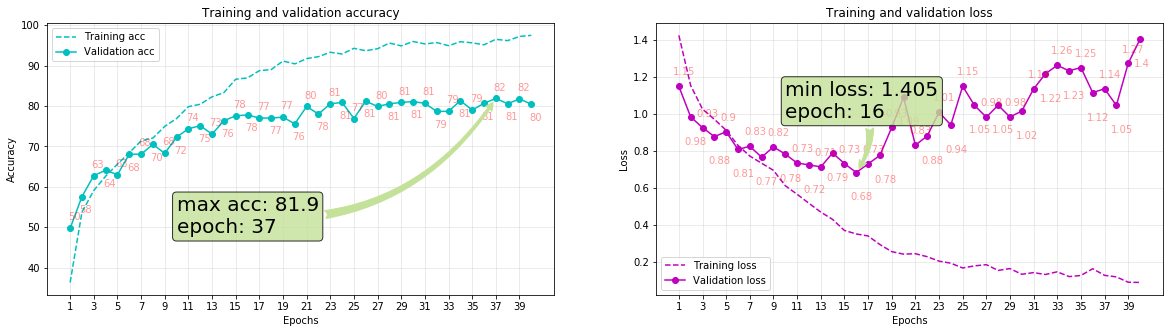

image_size: 	 150
batch_size: 	 20
epochs: 	 40
steps_per_epoch: 	 92
validation_steps: 	 46
learning_rate: 	 0.001
optimizer: 	 RMSprop
metrics: 	 ['acc']
train duration:	 3.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (N

In [117]:
import os
import helper as hlp
#from keras import layers
#from keras import models

model_filename = '15781_2_7_6_26_base'
model_h = hlp.load('models/' + model_filename)
print('model file name is:', model_filename)
hlp.show_model_plot(model_h);
show_model_info(model_h)
model_h['history'].model.summary()

In [107]:
model_h

{'history': <keras.callbacks.History at 0x26525183708>,
 'train_duration': 416,
 'hyper_parameters': {'image_size': 150,
  'batch_size': 20,
  'epochs': 40,
  'steps_per_epoch': 92,
  'validation_steps': 46,
  'learning_rate': 0.0001,
  'optimizer': '<keras.optimizers.RMSprop object at 0x0000021639791548>',
  'metrics': ['acc'],
  'fine_tuning_startlayer': 'block5_conv1'}}

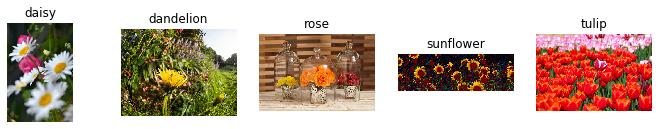

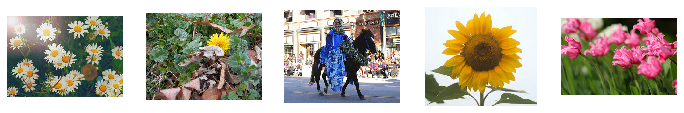

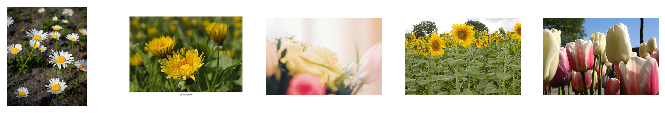

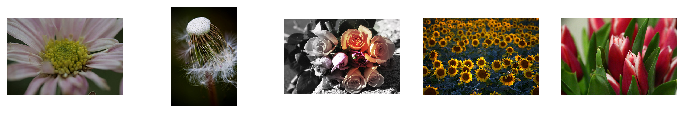

In [108]:
import matplotlib.image as mpimg

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[21]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    a.set_title(f)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[28]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[38]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

fig = plt.figure(figsize=(12,4))
for i, f in enumerate(classes_names):
    sample = os.listdir(os.path.join(input_data_dir['test'], f))[58]
    img = mpimg.imread(os.path.join(input_data_dir['test'], f, sample))
    
    a = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(img)
    plt.axis('off')
plt.show()

(1, 150, 150, 3)


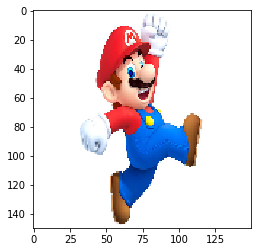

daisy 	 0.0
dandelion 	 0.0
rose 	 0.9993
sunflower 	 0.0
tulip 	 0.0007


In [263]:
basepath = os.path.join(base_dir, 'heatmap')
filenames = os.listdir(basepath)
use_file = filenames[0]

img_path = os.path.join(basepath, use_file)
model = model_h['history'].model

from keras.preprocessing import image
import numpy as np

image_size = model_h['hyper_parameters']['image_size']

img = image.load_img(img_path, target_size=(image_size, image_size))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

p = model.predict(img_tensor)
predict_by_name(p[0], classes_names)

In [264]:
#from keras.applications.vgg16 import VGG16
#model = model_h['history'].model #VGG16(weights='imagenet')

In [265]:
#from keras.preprocessing import image
#from keras.applications.vgg16 import preprocess_input, decode_predictions
#import numpy as np
#img_path = '/Users/fchollet/Downloads/creative_commons_elephant.jpg'
#img = image.load_img(img_path, target_size=(image_size, image_size)) #image.load_img(img_path, target_size=(224, 224))
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

In [266]:
preds = model.predict(img_tensor) #preds = model.predict(x)
print('Predicted:', predict_decodder(preds[0], top=3)) #print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('daisy', 1.677127e-18), ('dandelion', 1.4079875e-10), ('rose', 1.8446163e-07)]


In [267]:
predict_decodder(preds[0], top=3)

[('daisy', 1.677127e-18),
 ('dandelion', 1.4079875e-10),
 ('rose', 1.8446163e-07)]

In [268]:
np.argmax(preds[0])

4

In [269]:
from keras import backend as K

african_elephant_output = model.output[:, 2]
last_conv_layer = model.get_layer('conv2d_8')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
for i in range(8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

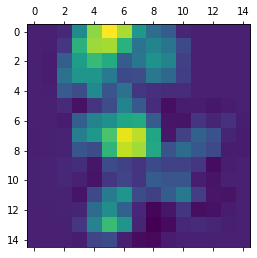

In [270]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.savefig(os.path.join(base_dir, 'heatmap', use_file + '_heatmap_raw.png'))

In [271]:
#!pip install opencv-python

In [272]:
import cv2
import time

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.7 + img
filename = str(round(time.time()))
filename = '_'.join(['heatmap', filename[:5], filename[5:6], filename[6:7], filename[7:8], filename[8:]])
cv2.imwrite(os.path.join(base_dir, 'heatmap', use_file + '_heatmap.png'), superimposed_img)

True

In [273]:
cv2.imwrite(os.path.join(base_dir, 'heatmap', filename + '_heatmap_merged.png'), heatmap)

True